# Predicting the Early Stages of Alzheimer's Disease to Potentially
# Prevent or Delay the Development of Dementia - Part 1

## Utilising the Multi-Class, Single Label, Sequential Model Architecture (and Dropout)


## 1. Introduction
Alzheimer’s disease (AD) is the most common cause of dementia. Dementia is the name for a set of symptoms that includes memory loss and difficulties with thinking, problem-solving or language. Dementia develops when the brain is damaged by diseases, including AD. It's a physical disease that affects the brain. It is named after Alois Alzheimer, the doctor who first described it.

The brain is made up of billions of nerve cells that connect to each other. In AD, connections between these cells are lost. This is because proteins build up and form abnormal structures called ‘plaques’ and ‘tangles’. Eventually nerve cells die and brain tissue is lost.

The brain also contains important chemicals that help to send signals between cells. People with Alzheimer’s have less of some of these ‘chemical messengers’ in their brain, so the signals are not passed on as well. There are some drug treatments for Alzheimer’s disease that can help boost the levels of some chemical messengers in the brain. This can help with some of the symptoms.

Alzheimer’s is a progressive disease. This means that gradually, over time, more parts of the brain are damaged. As this happens, more symptoms develop, and they also get worse. More than 520,000 people in the UK have dementia caused by AD and this figure is set to rise [1].

Currently, there is no effective cure for AD, but its progression can be delayed with some treatments, like the drug treatments mentioned above or clinical diagnosis mentioned in Section 2 below. Accurate and early diagnosis of AD is vital for the patient care and development of future treatment.

Thus, there is a need for automatic diagnosis of certain diseases from medical images that could help medical practitioners for further assessment towards treating the illness. AD is a good example of a disease that is often misdiagnosed. And AD is caused by atrophy of certain brain regions and by brain cell death. Magnetic Resonance Imaging (MRI) scans reveal this information but atrophied regions are different for different individuals which makes the diagnosis a bit more trickier and often gets misdiagnosed [2].



## 2. Objectives

**Clinical Diagnosis of Alzheimers Disease**

As stated previously, although no disease-modifying agents are capable of reversing the initial pathological changes are currently available, it may be possible to prevent or delay the development of dementia in a proportion of the population by modifying exposure to common risk factors. In other individuals, diagnosing the disease or risk of disease early is still valuable so that the individual and their carers have time to make choices and plan for the future, and to allow access to treatments that can help manage symptoms.

The positive benefits of receiving an early Alzheimer’s disease diagnosis to the patient are that it provides an explanation for the symptoms and signs they are experiencing and puts an end to their suspicions. An early diagnosis and subsequent access to the right services and support can help people take control of their condition, live independently in their own home for longer, and maintain a good quality of life for themselves, their family and carers [3].

**Magnetic Resonance Imaging (MRI) in the Diagnosis and Prognosis of Alzheimers Disease**

The uncertainty inherent in a clinical diagnosis of AD has driven a search for diagnostic imaging markers.  An obvious strength of MRI is its availability. A testament to its value in diagnosis in dementia is the fact that European and U.S. guidelines recommend that all subjects with cognitive decline undergo structural imaging (MRI or CT) and that it is part of proposed diagnostic criteria for AD and for other dementias. In most centers, MRI is regarded as an essential investigation in dementia — a marker of its utility.

MRI is safe and as it does not involve ionizing radiation individuals can be imaged serially without concerns about carcinogenicity. MRI offers a range of different sequences that can probe different tissue characteristics providing multiple clinical and research measures in the same session. Atrophy as an outcome measure has strengths over clinical measures because it is not subject to practice effects or (realistically) to floor or ceiling effects, and it theoretically has a greater ability to detect disease slowing [4].

Among several deep-learning techniques that have been applied to assessing structural brain changes on MRI is the convolutional neural network (CNN). This has gained popularity due to its superb efficiency in automated feature learning with the use of a variety of multilayer perceptrons [5].

An Alzheimer's MRI produces 3D imaging of the hippocampus, clearly showing how many cells are present and how big it is. The Alzheimer's Disease Brain Comparison is illustrated below [6]:

![title](alzheimers_disease_brain_comparison.png)

Therefore, having a deep learning model that detects AD in the early stages can allow longer life expactancy from the patient as well as higher life quality overall from the slowdown of dementia.

Thus, our objective is to:

To provide a complete pipeline to develop a deep learning model. More specifically, a multiclass classification (single label) deep learning model that can predict what stage (refer below) of Alzheimer's a patient is, from their MRI image:

- Mild Demented 

- Moderate Demented

- Non Demented

- Very Mild Demented

We shall focus on sequential dense and dropout layers, as the preferred deep learning method.


## 3. Dataset

The dataset was retrieved from Kaggle [7]. A platform which allows users to source their data sets and explore/ build upon them (license or rules permitting). The Alzheimers Dataset contains 4 classes of MRI images:

- Class 1: Mild Demented (896 Images)
- Class 2: Moderate Demented (64 Images)
- Class 3: Non Demented (3200 Images)
- Class 4: Very Mild Demented (2240 Images)

The original source of the data is not known, it was hand collected from various websites with each and every label verified. It provides 6400 MRI images, in .jpeg format.

The data has been released under the Apache 2.0 open source license, the total size of the files are 29MB and all the images are resized to 128 x 128 pixels. 

To summarize, this dataset has a usuability score of 8.75. Hence, it's easy enough to intepret and well documented. After some research, it is evident this is a good quality data set for the topic of implementing a neural network model (incorporating sequential dense and dropout layers), to predict one of the four stages of alzheimers disease, using MRI scans of the brain.

The dataset will require further preprocessing, as in splitting into training and test files.

Techniques, insights, rational and caveats behind the code are presented with Python comments and individual summaries below.


## 4. Evaluation Methodology (Choosing a Measure of Success)

In Deep Learning, our goal is to achieve a deep learning model that generalizes well on new unseen data or unknown data.

While evaluating a model we always split our data into three sets: training, validation and test set. 

1. Training Data: Train with this set
2. Validation Data: Perform evaluation with this set, to reduce overfitting
3. Test Data: Perform the final test with this set

We tune the parameters of the model according to the validation loss and validation accuracy. And we repeat this process until we get the model that best fits on the validation set. And after choosing the best model, we test or confirm our results on the testing set to get the correct accuracy, or how well our model is generalised.

While developing a model, we tune the parameters of the model, whether they're hyperparameters or network’s weights. We perform this tuning, receiving the feedback signal on the performance of the model, on validation data. Tuning is a form of learning. When we, repeatedly, tune the model on the basis of the validation set, it starts leaking the information. Finally, we’ll end up with a model that performs artificially well on the validation data, which we optimized for. Now we measure the performance of our model on completely new data called test data, which tells us how well our model is generalised [15].

It's also important to guage the model's performance with the F1 score, as opposed to accuracy (which masks the issue of class imbalance, such as ours).   

![title](model_evaluation.png)


## 5. Deciding on an Evaluation Protocol

We must establish how we'll measure current progress. We can choose from one of the three options below:

1. Maintaining a hold-out validation set: The way to go when we have plenty of data

2. Performing K-fold cross-validation: The correct choice when we have too few samples for hold-out validation to be reliable

3. Performing iterated K-fold validation: For performing highly accurate model evaluation when little data is available

Hold-out validation appears to be the best evaluation protocol, as we have 6400 images to work with.

## 6. Data Preprocessing

As we're using a 3rd party dataset, the import procedure (and code) is slighlty different from the procedure used by the default tf.keras.datasets module, for toy datasets. Hence, we require to mount the Gdrive and unzip our folders. 

We also need to split the four folders of files (e.g. images) into train, validation and test (dataset) folders.


In [ ]:
#Please Note:
#Error converting from notebook to html i.e. running plots
#if plots don't show, manually include a local version of require.js. Get a copy here - https://requirejs.org/docs/download.html#requirejs
%%HTML
<script src="require.js"></script>

In [ ]:
#*************************************************************#
                         #Import Libraries#
#*************************************************************#

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt, seaborn as sb
import plotly.express as px
import plotly.io as pio

import matplotlib.pyplot as plt

#for deep learning

#the ImageDataGenerator class in keras provides a suite of techniques for scaling pixel values in our image 
#dataset prior to modeling.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras import layers
from tensorflow import keras
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping

#for evaluation
from sklearn.metrics import f1_score

In [ ]:
#*************************************************************#
                         #Import Data#
#*************************************************************#

#directory to dataset in drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

dataset_path = '/content/gdrive/My Drive/NewFolder/Dataset/'

Mounted at /content/gdrive


In [ ]:
#This cell unzips the dataset downoaded from kaggle. It needs to be executed only once. to unzip
#!unzip '/content/gdrive/My Drive/NewFolder/archive (1).zip' -d '/content/gdrive/My Drive/NewFolder/'

In [ ]:
#Refer to reference 8
#split into train, test and validation sets,for evaluation purposes
#the seed lets us reproduce the splits and this library allows randomized oversampling for imbalanced datasets.

!pip install split-folders
import splitfolders
splitfolders.ratio(dataset_path, output="output", seed=1345, ratio=(.8, 0.1, 0.1)) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 6400 files [01:53, 56.59 files/s] 


In [ ]:
#Refer to reference 9, for code

#the dataset is now split between a training, test and validation set after using 'splitfolders' library above
#5,119 images in training, 642 images in test and 639 images in validation. 

#use SEED wherever possible. this eliminates the noise from random initialization which makes our model more robust

#models trained with small batch sizes generalize well on the validation set.
#for our coursework, we are training our model with the batch size ranging from 8 to 2048 

#batch size controls the accuracy of the estimate of the error gradient when training neural networks
#it also affects training time, and compute resources 

#Refer to Reference 10, for background

IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=42,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=32
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=42,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=42,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=32
)

Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 639 files belonging to 4 classes.


In [ ]:
#print the 4 class labels

class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#return elements in the given positional indices (not actual values), along an axis
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

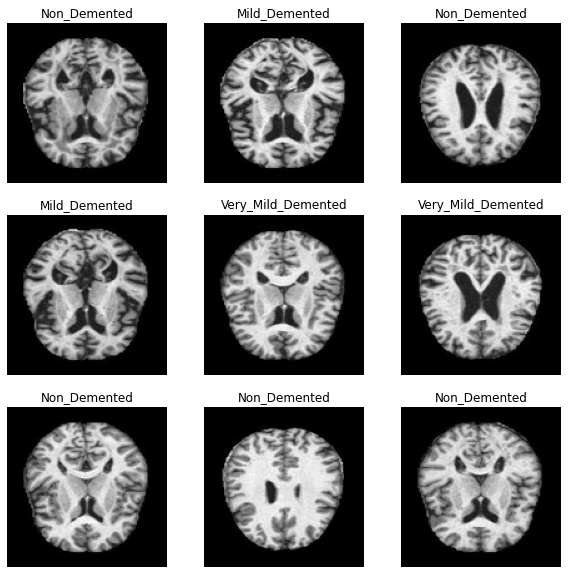

In [ ]:
#*************************************************************#
                         #Visualize the Images#
#*************************************************************#

#Refer to reference 9, for code

#what we have below is a 3D tensor of 8-bit integers. More precisely, it’s an array of 6400 matrices of,
#128 × 128 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.
#here, we'll display 9 of these images

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))#data type
        plt.title(class_names[labels[i]])
        plt.axis("off")

<function matplotlib.pyplot.show(*args, **kw)>

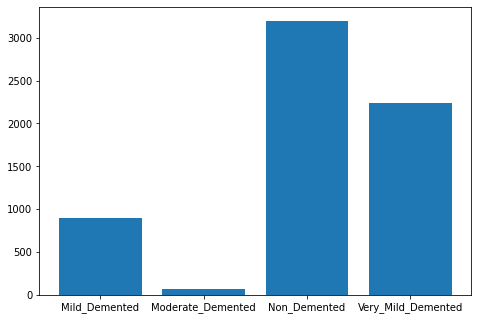

In [ ]:
#*************************************************************#
        #Visualize the Data - Check for Imbalance#
#*************************************************************#

#check how images are distributed in 4 categories i.e. are they balanced?
#as can be seen below, the data is very imbalanced, 'moderate demented' being the minority class

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [896,64,3200,2240]# refer to section 3-Data above, for counts in each category
ax.bar(class_names,size)
plt.show



In [ ]:
class_names

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [ ]:
#*************************************************************#
        #Address Imbalance with SMOTE#
#*************************************************************#

#feeding imbalanced data to our classifier can make it biased in favor of the majority class, simply because it 
#did not have enough data to learn about the minority classes. hence our high level of imbalance can potentially
#impact our model performamce. this is certainly true, if we don't have enough samples to train with,
#such as our case

#Synthetic Minority Oversampling Technique (SMOTE) is one of the most commonly used statistical techniques 
#(oversampling method) used, to solve imbalance problems.  it aims to balance class distribution by randomly
#increasing the 3 minority class instances above ('mild_demented', 'moderate_demented' and 'very_mild_demented'), 
#by replicating them. SMOTE synthesises new minority instances between existing minority instances

#first, convert images into numpy arrays in order to apply SMOTE 

#next, we load each image into a list, and save the corresponding label in another list
data_src=dataset_path
data=[]
y=[]
for d in os.listdir(data_src):
    for file in os.listdir(data_src+d):
        data.append(Image.open(data_src+d+'/'+file))
        y.append(d)

In [ ]:
#convert each image into a numpy array

X=[]
for im in data:
    X.append(np.array(im))

In [ ]:
#convert the list of data into an array

X=np.array(X)

In [ ]:
#check shape of numpy array

X.shape

(6400, 128, 128)

In [ ]:
#*************************************************************#
                         #Rescaling#
#*************************************************************#

#refer to Reference 9 for code

#neural networks have difficulty adapting to heterogeneous data. the data will have to be normalized or rescaled.
#for consistency, test data is normalized using the mean and standard deviation of the training set.

#so, rescaling can be used to rescale pixel values from the range of 0-255 (0 is black and 255 is white, or min/ max), 
#to the range 0-1 (normalization) - this is the preferred (small) range for neural network models. 
#we rescale 1./255 to transform every pixel value from range [0,255] -> [0,1] 

#all features should ideally take the values in roughly the same range because inhomogeneity can trigger large 
#gradient updates and hamper conversions i.e. poor learning

#Divide by 255 to standardize the values between 0 and 1

X=X/255

In [ ]:
#let's count how many of each category we have

non=0
mild=0
mod=0
vm=0
for cat in y:
    if cat=="Mild_Demented":
        mild+=1
    elif cat=="Moderate_Demented":
        mod+=1
    elif cat=="Non_Demented":
        non+=1
    else:
        vm+=1
print("Non Demented: ",non)
print("Very Mild: ",vm)
print("Moderate: ",mod)
print("Mild :",mild)

Non Demented:  3200
Very Mild:  2240
Moderate:  64
Mild : 896


In [ ]:
#now we change these values/ labels to numerical ones so that we can use to_categorical
#0 will be non, 1 will be very mild, 2 will be mild, 3 will be moderate

y_num=[]
for cat in y:
    if cat=="Mild_Demented":
        y_num.append(2)
    elif cat=="Moderate_Demented":
        y_num.append(3)
    elif cat=="Non_Demented":
        y_num.append(0)
    else:
        y_num.append(1)

In [ ]:
#convert to a categorical target as expected by keras

y=to_categorical(y_num)

In [ ]:
#flatten the images, because smote accepts structural data as input

X_reshaped=X.reshape((6400,128*128))

In [ ]:
#now apply smote to transform the dataset

sm=SMOTE(random_state=42)
train_data, train_labels = sm.fit_resample(X_reshaped, y)

In [ ]:
#we can now see the number of images have doubled 

print(train_data.shape)

(12800, 16384)


In [ ]:
#visualize how smote oversampled each class

y_oversampled=np.argmax(train_labels,axis=1)

In [ ]:
#count the numbers in each category

hist_results=np.histogram(y_oversampled,bins=[0,1,2,3,4])
hist_results[0]

array([3200, 3200, 3200, 3200])

<function matplotlib.pyplot.show(*args, **kw)>

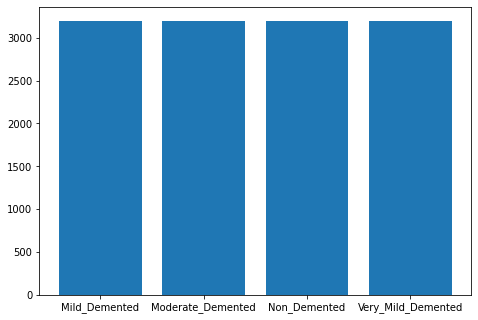

In [ ]:
#0 will be non, 1 will be very mild, 2 will be mild, 3 will be moderate

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = hist_results[0]# refer to section 3-Data above, for counts in each category
ax.bar(class_names,size)
plt.show

In [ ]:
#reshape to use in a neural network by batches (as we have a new shape after SMOTE)

batch_size=1
train_data_batched=train_data.reshape(12800,16384,batch_size)

In [ ]:
#after SMOTE we need to split the dataset into training, validation and test sets

X_train, X_test, y_train, y_test = train_test_split(train_data_batched, train_labels, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

**Pre-Processing Summary**

Overall, data is already represented as tensors, labels are encoded to categorical, data is rescaled, rebalanced using SMOTE, and no feature engineering is required

## 7. Baseline Performance

A baseline is a model that should be both simple to set up and has a reasonable chance of providing decent results. Experimenting with them is usually quick and low cost, since implementation is widely available in popular packages.

Our goal is to achieve statistical power, to develop a small model that is capable of beating a dumb baseline i.e for image classification (such as the MNIST digit dataset), anything that achieves an accuracy greater than 0.1 can be said to have statistical power.

The three key choices to build the first working model are [14]:

- Last layer activation: This establishes useful constraints on the networks output.  It depends on the problem type. Refer to table below for choosing the right last layer activation for our model

- Loss function: This should match the type of problem we're trying to resolve. Refer to table below for choosing the right last layer activation for our model

- Optimization configuration: What optimizer shall we use and what is it's learning rate? For baseline models, it's safe to go with rmsprop and it's default learning rate. 

![title](baseline_table.png)


In [ ]:
#baseline - building the network
##the relu function returns the maximum of the input and 0 i.e. ReLU sets all negative values in the matrix/vector to zero and all other values are kept constant

model = Sequential([#create empty network object. sequential means the network is a series of transformational layers 
  layers.Flatten(),
  
  layers.Dense(64, activation='relu'),#each neural layer performs the computation/ activation, output = relu(dot(w, input) + b), mapping rank input tensors to rank output tensors. the second layer outputs a tensor with 64 elements. or, the representational space of this layer has 64 dimensions, the layer has 64 (hidden) units

  layers.Dense(32, activation='relu'),#the tensors are w, the tensor of weight parameters,b, the tensor of bias parameters, and x, the input tensor.The tensors are dotted, added,and a function f is applied. this layer performs a geometric transformation, resulting in a point in 32 dimensional space. this layer transforms an input tensor into a 1D tensor of length 32 - equivalent to a 32 dimeensional vector
  layers.Dense(4, activation='softmax')#softmax outputs a vector whose elements form a probability distribution (non negative floats that sum to one). outputs are interpreted as probabilities of membership of each class: the probability that the input sample is labeled '1/ mild demented', or '2/ moderate demented' and so on. outputs a 4 dimensional vector 
])


In [ ]:
#baseline - compiling the model

model.compile(optimizer='rmsprop', #the optimizer (all sgd variants) makes parameter adjustments (layers, weights and biases) in the training loop and metrics reports on progress
              loss='categorical_crossentropy',#how far off the network prediction is from the target/ quantifies performance
              metrics=['accuracy'])#is the fraction of correctly classified samples

#'sparse' categorical crossentropy is used when classes are represented as integers 1,2,3,4 etc
#only categorical crossentropy is used when classes are one hot encoded i.e. 0100, 0001 and so forth.

#we have used categorical cross entropy due to utilising one hot encoded labels .this has no effect on model 
#performance. model performance will be the same in both cases if data is represented as integers or one hot 
#encoded.


In [ ]:
#baseline - training the network

history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=4, verbose=1)

Epoch 1/4
240/240 [==============================] - 5s 6ms/step - loss: 1.7196 - accuracy: 0.3598 - val_loss: 1.1349 - val_accuracy: 0.5055
Epoch 2/4
240/240 [==============================] - 1s 4ms/step - loss: 0.9562 - accuracy: 0.5599 - val_loss: 0.9351 - val_accuracy: 0.5285
Epoch 3/4
240/240 [==============================] - 1s 4ms/step - loss: 0.8021 - accuracy: 0.6172 - val_loss: 0.6573 - val_accuracy: 0.6906
Epoch 4/4
240/240 [==============================] - 1s 4ms/step - loss: 0.7274 - accuracy: 0.6514 - val_loss: 0.7982 - val_accuracy: 0.6301


**Baseline Model Summary**

From the output/execution of the above, our network is producing a training accuracy of 0.6514 and a
validation accuracy of 0.6301.  This is way above the expected default of 0.1 for image classification, which is
positive.

We're also using a smaller model here i.e. less layers and units, which deems it less complex.

Finally, this baseline helps us decide on a modelling strategy for a sequential dense network. However, as it's 
performance is generally weak, we have built a more complex, robust model in section 8 below.


## 8. Scaling Up - Developing a Model that Overfits

Now we can build a more complex, dense layer neural network and train it on our data set.
Every neural network has three types of layers or hyperparameters: input, hidden, and output

To know how big a model we require, we must develop a model that overfits. We can:

- Add more layers
- Make the layers bigger i.e. add more units
- Train for more epochs


#### Building the Network

The first line in our code below, creates a Sequential model and this is the simplest type of data structure in Keras and is basically a sequence of connected layers in a network.

The first layer in the model is a flatten layer and is there for pre-processing of the data. What this does is take each 128 x 128 NumPy array for each image and flattens it into a 1D (1 x 16,384) array that the network can work with.  This layer has no parameters to learn; it only reformats the data.

Our network has a depth, 4. 

#### Compiling the Model

The loss function: In our case we are using categorical cross entropy — use this loss function when our classes are mutually exclusive (e.g. when each sample belongs exactly to one class) and categorical crossentropy when one sample can have multiple classes or labels are soft probabilities (like [0.5, 0.3, 0.2]).

The optimizer: we are going to use to optimise the model against the loss function is stochastic gradient descent and this will ensure the model converges on an optimum solution i.e. Keras will use the backpropagation method described above.

Finally, we specify a metric that we are going to use in addition to loss to give us an idea of how well our model is working. In this case, we are using accuracy which gives an idea of how well our model is doing by giving a percentage of how many predictions match the actual class for the model we are training.

#### Training the Network

We initially pass in the data that we want to train the network on. We also specify the number of epochs we want to train the model with (an epoch being defined as how many times we want to pass the training data through the network for training purposes).

Keras also lets us specify an optional argument, where we pass in a validation data set. If we do this, then at the end of each epoch Keras will test the performance of the network on the validation data set. This is a good way of ensuring the model isn’t overfitting, however, it doesn’t feed into the training itself.

[11, 12 and 13]


In [ ]:
#*************************************************************#
                         #Building the Network#
#*************************************************************#

#in order to create a model which overfits, we require to have some reference model. hence, we can use the model 
#from reference [16]

#this references an MLP network, and is used for MNIST digits, size 784 x 128 x 64 x 10 = 64,225,280 
#we have taken a much larger network 16384 x 1024 x 512 x 128 x 4 = 4,398,046,511,104, which is 68,478 larger than
#the MNIST digits network. hence, more than capable of overfitting


model = Sequential([
  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(512, activation='relu'),

  layers.Dense(128, activation='relu'),
  layers.Dense(4, activation='softmax')
])

#in summary, the 'output' layer for multi-classification tasks (such as this one), should have as many units as 
#there are classes i.e 4. use a softmax activation function for single-label multi-classification
#beware of creating information bottlenecks by defining small intermediate layers

#informtion dropped by a layer can never be recovered (could be a bottleneck). hence we require bigger layers 
#(more units) hence, our first layer we use 1024 unit layers

#affine transformations alone are unsufficient for data uncrumpling. we require a non-linear part, the activation i.e. relu
#without activations,layers would only perform affine transformations

#the batch size affects some indicators such as overall training time, training time per epoch, quality of the 
#model, and similar. usually, we choose the batch size as a power of two, in the range between 16 and 512. 
#but generally, the size of 32 is a rule of thumb and a good initial choice. it's the vector length
#the hypothesis space defined by the depth of network and the size and activation of each layer is arbitrary.there 
#is no formula. We have to rely on rules of thumb, best practices.
#each layer applies a few simple tensor operations, conceptually, the geometric transformation.
#transformations are parameterized by weights and biases.

#softmax heightens the larger elements of a vector whilst ensuring that the vector elements sum to one
#and, softmax retains information of the smaller elements.

In [ ]:
#*************************************************************#
                         #Compiling the Model#
#*************************************************************#

#The training specification is made at compilation
#The optimizer, loss function, and a monitoring metric are specified when the network is compiled.

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#categorical crossentropy is the preferred loss for problems in which each sample belongs to one of several classes
#many optimizers attempt to avoid the local optimum problem by employing momentum. tweaks layer parameters in a 
#backwards pass default learning value or tweak?


In [ ]:
#*************************************************************#
                         #Training the Network#
#*************************************************************#

#train the model for 80 epochs with the Keras Model.fit method:

#there are accuracy and loss metrics for both the training and validation data sets. the value of the accuracy 
#is a simple percentage measure of how many items the network got right. the value of loss is the 
#cross entropy loss.

#an epoch is a complete iteration over the entire training set. the loss is minimized by mini-batch 
#stochastic gradient descent, also known as SGD. weights and biases are adjusted after each mini-batch has been 
#processed

history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=80, verbose=1)#callbacks=callback


Epoch 1/80
240/240 [==============================] - 2s 6ms/step - loss: 1.3693 - accuracy: 0.5337 - val_loss: 0.7301 - val_accuracy: 0.6012
Epoch 2/80
240/240 [==============================] - 1s 4ms/step - loss: 0.6562 - accuracy: 0.6823 - val_loss: 0.6494 - val_accuracy: 0.6641
Epoch 3/80
240/240 [==============================] - 1s 4ms/step - loss: 0.6283 - accuracy: 0.7146 - val_loss: 0.5558 - val_accuracy: 0.7230
Epoch 4/80
240/240 [==============================] - 1s 4ms/step - loss: 0.5918 - accuracy: 0.7340 - val_loss: 0.6446 - val_accuracy: 0.7000
Epoch 5/80
240/240 [==============================] - 1s 4ms/step - loss: 0.5051 - accuracy: 0.7710 - val_loss: 0.4408 - val_accuracy: 0.7914
Epoch 6/80
240/240 [==============================] - 1s 4ms/step - loss: 0.4498 - accuracy: 0.7923 - val_loss: 0.4755 - val_accuracy: 0.7828
Epoch 7/80
240/240 [==============================] - 1s 4ms/step - loss: 0.4001 - accuracy: 0.8199 - val_loss: 0.3782 - val_accuracy: 0.8223
Epoch 

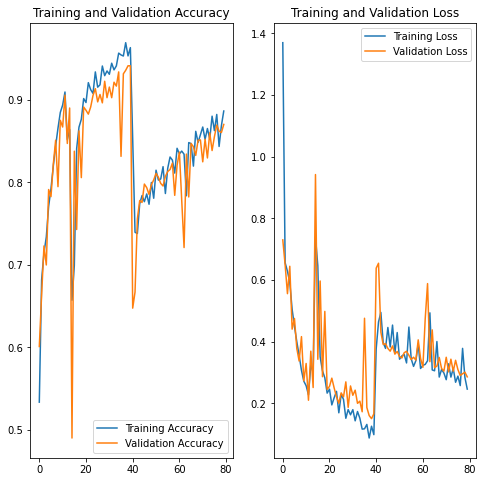

In [ ]:
#******************************************************************#
#Visualise Results with Training and Validation Accuracy/Loss Plots#
#******************************************************************#

#once the model is trained, it is possible to call its history method to get a dictionary of the loss and any 
#other metrics needed at every stage of the training

#as we see from the "Training and Validation Accuracy" plots below, training accuracy is clearly greater than 
#validation accuracy, for all epochs. with exception of the first 15 epochs, (which are stabilizing) 
#hence the result of these initial 15 epochs do not express the network state very well 

#this is the outcome, as the model can't generalize well. such models could mitigate overfitting with addition of 
#dropout, which we'll demonstrate below

#finally, we could possibly train this model longer as it doesn’t look like the loss has reached a minimum

#this means that the model will have a difficult time generalizing on a new dataset, hence we can't evaluate 
#on the test set, just yet. hence, we now require to increase the overall performance of the model


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(80)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
#*************************************************************#
                 #Overfitted Model Summary#
#*************************************************************#

#view all the layers of the network using the Keras Model.summary method:
#model.summary shows the output shape of each layer and the number of trainable parameters, the number of 
#parameters in the W and B layer tensors

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (32, 16384)               0         
                                                                 
 dense_3 (Dense)             (32, 1024)                16778240  
                                                                 
 dense_4 (Dense)             (32, 512)                 524800    
                                                                 
 dense_5 (Dense)             (32, 128)                 65664     
                                                                 
 dense_6 (Dense)             (32, 4)                   516       
                                                                 
Total params: 17,369,220
Trainable params: 17,369,220
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#make predictions
y_pred=model.predict(X_test)

80/80 [==============================] - 0s 2ms/step


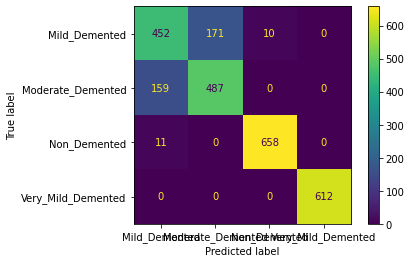

In [ ]:
#confusion matrix provides an overview of how well the overfitted model predicts the four classes

cm = confusion_matrix(np.argmax(y_test,axis=-1), np.argmax(y_pred,axis=-1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [ ]:
#the classification report provides the f1 score

print(classification_report(np.argmax(y_test,axis=-1), np.argmax(y_pred,axis=-1), target_names=class_names))

                    precision    recall  f1-score   support

     Mild_Demented       0.73      0.71      0.72       633
 Moderate_Demented       0.74      0.75      0.75       646
      Non_Demented       0.99      0.98      0.98       669
Very_Mild_Demented       1.00      1.00      1.00       612

          accuracy                           0.86      2560
         macro avg       0.86      0.86      0.86      2560
      weighted avg       0.86      0.86      0.86      2560



**Overfitted Model Summary**

As we see from the "Training and Validation Accuracy" plots above, training accuracy is clearly greater than 
validation accuracy, for all epochs. With exception of the first 15 epochs, (which are stabilizing). 
Hence the result of these initial 15 epochs do not express the network state very well. 

We could possibly train this model longer as it doesn’t look like the loss has reached a minimum.

This is the outcome, as the model can't generalize well. Such models could mitigate overfitting with addition of 
dropout, which we'll demonstrate below.

This means that the model will have a difficult time generalizing on a new dataset, hence we can't evaluate 
on the test set, just yet. Hence, we now require to increase the overall performance of the model.

Also, the confusion matrix visualizes the performance of our classifier.  We can determine our classifier has trouble distinguishing 'Mild Demented' and 'Moderate Demented' MRI images at this stage.

Finally, it can be seen from the classification report above, that the overfitted model accuracy (f1 score, to be specific) is much better than our baseline i.e. 0.86 verus 0.63. However, as stated above, we now require to deal with the overfitting issue in section 9 below.

In [ ]:
#the weight tensor has shape N, M, a matrix with N rows and M columns. therefore, there are N × M elements.
#the bias tensor is just a vector so the number of elements is equal to the length. the total number of trainable 
#parameters, the total number of elements in all the W and V tensors is therefore given by the sum which evaluates
#to 6,302 [Ref 17]

#def print_layer_tensor_shape(layer):

    #weight_params=model.layers[layer].get_weights()[0]
    #bias_params=model.layers[layer].get_weights()[1]
    #print(layer, '\t', weight_params.shape, '\t', bias_params.shape)

#print_layer_tensor_shape(layer=0)
#print_layer_tensor_shape(layer=1)
#print_layer_tensor_shape(layer=2)
#print_layer_tensor_shape(layer=3)

1 	 (16384, 1024) 	 (1024,)
2 	 (1024, 512) 	 (512,)
3 	 (512, 128) 	 (128,)


## 9. Hyperparameter Tuning and Regularization

#### Hyperparameter Tuning

The simplest way to prevent overfitting is to reduce the size of the model, the number of learnable parameters in the model (determined by number of layers and number of units per layer) i.e. the model's capacity. Hyperparameters are tuned by considering their effect on a validation set. The model absorbs something about the validation set every time a hyperparameter is tuned. The more experiments we perform, the more information leaks into our model. The training and test data should be representative i.e. the test set and training sets will contain different classes, this can be easily remedied by shuffling. We must also ensure that the training and test sets are disjoint. [14].  

#### Adding Dropout (Regularization Technique)

A model underfits whilst lowering the losses on both training data and validation data and overfits when training loss falls, whilst validation loss rises. Overfitting means the model fits ever more closely to the specific patterns of the training set, but the model fails to generalize. The best solution is to find more training data, but data is often limited. Hence, we have to regularize.

Techniques to reduce overfitting are; network size reduction, weight regularization and dropout regularization to the network. We'll focus on dropout.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer

Dropout is removed while evaluating the final network. The output layers of the final network need to be scaled downby the dropout rate because one-half of the layer outputwas effectively removed during training.Desired outputs will be twice as large when the network is restoredto its full size and applies the test set.[9].


In [ ]:
#define function for hyperparameter tuning

#plus, other changes made to reduce overfitting:

# 1) model size reduced drastically, around 10 times, as previous model was really big. 
# current model size is 16384 x 128 x 64 x 32 x 4. 

# 2) add dropout to mitigate overfitting

# 3) add batch normalisation to mitigate overfitting

def create_model(activation_function,optimizer,dropout_rate):

	#create model - add dropout layers between each pair of dense layers for regularization, into previous model above
	#the dropout layer takes an argument 'rate', which specifies the proportion of neurons in the preceding dense
	#layer,that should take a value of zero.  in this model, the rate is set to 0.5, which means 50% of the neurons
	#in the hidden layers are given a weight of 0.
  
	model = Sequential([
			#create empty network object. sequential means the network is a series of transformational layers 
	layers.Flatten(),
	Dropout(dropout_rate),
	BatchNormalization(),
	layers.Dense(128, activation=activation_function),
  Dropout(dropout_rate),
	BatchNormalization(),
	layers.Dense(64, activation=activation_function),
	Dropout(dropout_rate),
	BatchNormalization(),
	layers.Dense(32, activation=activation_function),
	Dropout(dropout_rate),
	BatchNormalization(),
	layers.Dense(4, activation='softmax'),#outputs a vector whose elements form a probability distribution (non negative floats that sum to one). outputs are interpreted as probabilities of membership of each class: the probability that the input sample is labeled '1/ mild demented', or '2/ moderate demented' and so on 
	])
    
	if(optimizer=="SGD"):  		
		opt=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
	elif(optimizer=="adam"):		
		opt=keras.optimizers.Adam(learning_rate=0.01)
	elif(optimizer=="RMSprop"):		
		opt=keras.optimizers.RMSprop(learning_rate=0.01)
	
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])		
 	
	return model


In [ ]:
# For additional hyper parameter tuning we have added 3 parameters to control 

# 1) Activation functions - 'tanh' and 'sigmoid' may be work better than relu in some cases, but generally we know 
#that relu is the rule of thumb
activation_function_arr=['relu','tanh','sigmoid']

# 2) Different optimizers - 'adam' is the typical choice when training the larger network, but if the network is 
#simple, maybe SGD and RMSprop converge faster
optimizer_arr=["SGD","adam","RMSprop"]

# 3) Different dropout rates - dropout rate is the parameter which we can't anticipate which value will work best, 
#so we require to trial
dropout_rate_arr=[0.3,0.4,0.5]
epochs=80

#use Early Stopping
#this is a regularization technique to avoid overfitting when training a learner with an iterative method,
#such as hold out validation. used for deep neural networks and stops training when parameter updates no longer 
#begin to yield improves on a validation set

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)

In [ ]:
#execute hyper parameter search using for loops (as opposed to the library, Gridsearch)

f1score_max=0
best_hyper_params=[]
best_history=None
iter=0
best_model=None
for activation_function in activation_function_arr :
  for optimizer in optimizer_arr :
    for dropout_rate in dropout_rate_arr :
      print("iter=",iter,"hp vapues=",[activation_function,optimizer,dropout_rate])
      model=create_model(activation_function,optimizer,dropout_rate)
      history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=epochs, verbose=0,callbacks=[es])#callbacks=callback
      y_pred=model.predict(X_test)

      f1score=f1_score(np.argmax(y_test,axis=-1), np.argmax(y_pred,axis=-1), average='weighted')
      print("f1 score for iter ",iter,"= ",f1score)
      iter=iter+1
      #Test for maximum accuracy
      if(f1score>f1score_max):
        f1score_max=f1score
        best_hyper_params=[activation_function,optimizer,dropout_rate]
        best_history=history
        best_model=model

print("Hyper parameter searching process is finished")
print("Best set of hyper parameteres=",best_hyper_params)
print("Best F1 score value=",f1score_max)

iter= 0 hp vapues= ['relu', 'SGD', 0.3]
Epoch 99: early stopping
80/80 [==============================] - 0s 2ms/step
f1 score for iter  0 =  0.9949214402930922
iter= 1 hp vapues= ['relu', 'SGD', 0.4]
Epoch 94: early stopping
80/80 [==============================] - 0s 2ms/step
f1 score for iter  1 =  0.9839610539329501
iter= 2 hp vapues= ['relu', 'SGD', 0.5]
80/80 [==============================] - 0s 2ms/step
f1 score for iter  2 =  0.90594720001182
iter= 3 hp vapues= ['relu', 'adam', 0.3]
Epoch 73: early stopping
80/80 [==============================] - 0s 2ms/step
f1 score for iter  3 =  0.9033091759562593
iter= 4 hp vapues= ['relu', 'adam', 0.4]
Epoch 17: early stopping
80/80 [==============================] - 0s 2ms/step
f1 score for iter  4 =  0.6875440179840053
iter= 5 hp vapues= ['relu', 'adam', 0.5]
Epoch 25: early stopping
80/80 [==============================] - 0s 2ms/step
f1 score for iter  5 =  0.6537049820103503
iter= 6 hp vapues= ['relu', 'RMSprop', 0.3]
Epoch 47: earl

## 10. Evaluation 

Choose the model with best set of parameters, from above. Evaluate it one last time on the test set. 

Hence, generalization is now checked by running on unused test data, the holdout set.

If the performance on the test set is significantly worse than on the validation set, it might mean that the validation procedure wasn't reliable, or that information was leaked. Perhaps switch to a more reliable evaluation procedure such as iterated K-fold.


Epoch 94: early stopping
80/80 [==============================] - 0s 2ms/step


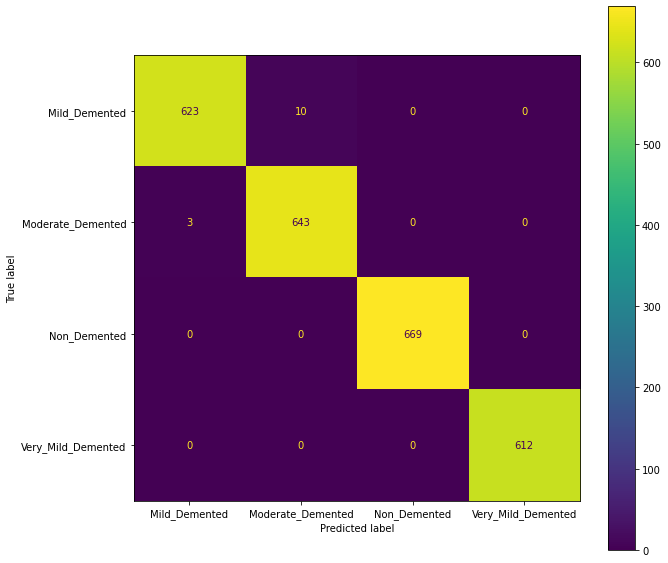

In [ ]:
# Evaluate the best model which we found by hyper parameter optimisation

model=create_model('relu','SGD',0.3)#found these 3 hyperparameters during execution of hold out validation
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=epochs, verbose=0,callbacks=[es])#callbacks=callback

y_pred=best_model.predict(X_test)

cm = confusion_matrix(np.argmax(y_test,axis=-1), np.argmax(y_pred,axis=-1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [ ]:
print(classification_report(np.argmax(y_test,axis=-1), np.argmax(y_pred,axis=-1), target_names=class_names))

                    precision    recall  f1-score   support

     Mild_Demented       1.00      0.98      0.99       633
 Moderate_Demented       0.98      1.00      0.99       646
      Non_Demented       1.00      1.00      1.00       669
Very_Mild_Demented       1.00      1.00      1.00       612

          accuracy                           0.99      2560
         macro avg       0.99      0.99      0.99      2560
      weighted avg       0.99      0.99      0.99      2560



## 11. Results

Our Baseline Performance (Section 7) helped us decide on a modelling strategy for a sequential dense network. It's performance or validation accuracy was 0.6301, which was way above the expected default of 0.1000 for image classification.  However, as performance was generally weak, we built a more complex, bigger, robust model in section 8 (Scaling Up - Developing a Model that Overfits).

In Section 8, we developed our overfitted model that produced an F1-Score or validation accuracy of 0.86. This outperformed our baseline and is generally strong, however, this model can't generalize well - as could be seen from the Training and Validation Accuracy/Loss Plots. This means that our model will have a difficult time generalizing on a new dataset, hence we couldn't evaluate on the test set at that stage. Hence, we required to increase the overall performance of the model.

Such models can mitigate overfitting with hyperparameter tuning and the addition of dropout, detailed in Section 9 (Hyperparameter Tuning and Regularization).  Hence, the best model was found by hyperparameter tuning, during the evaluation protocol stage (as described in Section 5 above). There were many hyperparameters that we could have utilised in our function.  However, we settled on 3:

1. Activation Function (relu, tanh or sigmoid)
2. Optimizers (SGD, adam and RMSprop)
3. Dropout rate (0.3, 0.4 and 0.5)

So, after 27 permutations/ evaluations with our function, relu, SGD and 0.3 were found to be the best set of parameters.  

Summarising our Confusion Matrix above:

1. For the 'Mild Demented' MRI images, the classifier correctly predicted 623 of them. However, 3 images were incorrectly predicted as 'Moderate Demented'
2. For the 'Moderate Demented' MRI images, the classifier correctly predicted 643 of them. However, 10 images were incorrectly predicted as 'Mild Demented'
3. For the 'Non Demented' MRI images, the classifier correctly predicted all 669 of them. Hence, the network recognizing 100% of the 'Non Demented' MRI images.
4. For the 'Very Mild Demented' MRI images, the classifier correctly predicted all 612 of them. Hence, the network recognizing 100% of the 'Very Mild Demented' MRI images.

In Section 10 (Evaluation), we finally evaluated our data with our holdout set (unused test images).    
The performance on the test set was 0.99, the same as 0.99 for the validation set.  As the test set performance is similar to the validation set performance, it indicates the validation/ evaluation procedure was reliable and no information was leaked.  


## 12. Conclusions
There's a fine balance between optimization of training data and generalization i.e. fine tuning v overfitting.

We can mitigate overfitting with a one or two hidden layer network if our dataset is small. However, in our case we have four dense layers and a regular sized dataset. Not overly complex, however, overfitting was addressed with:

- Hyperparameter tuning with 3 integral hyperaparameters
- Reducing model size drastically, around 10 times, from 16384 x 1024 x 512 x 128 x 4 to current model size of 16384 x 128 x 64 x 32 x 4
- Adding dropout
- Adding batch normalization
- Using early stopping

We would also add, that data should also be well shuffled and all classess equally represented in training, validation and test sets to mitigate overfitting. To be specific, we require a stratified shuffle split which shuffles the data, but maintains the proportions. Hence, we know that the data is ready to feed our model.

Re hyperparameters/ fine tuning, as activation functions are mandatory to prevent linearity and with complex problems such as ours, the images cannot be modelled well by a linear equation. We also considered the optimizer, as they are integral to changing relevant attibutes such as weights and learning rate, in order to reduce losses. With our optimized learning rate, it's not too big to jump around the global minimum and not too small to arrive at the global minimum too late. Finally, we opted for dropout, as it's extremely important to regularize our model for unseen images, and dropout is considered the premium default in the field of deep learning.

It was also important to obtain a balance with regards to hidden units. More hidden units means more complex representations can be learned. However, the network can be more computationaly expensive. Hence, why we reduced our model archtecture. Plus, overfitting can occur with the bigger model architecture, where the performance on the test set is negatively impacted.

Overall, we produced a neural network (sequential dense and droput layers)that can predict what stage of Alzheimer's a patient is, from the MRI image of their brain. Our final model (after fine tuning and addressing overfitting) had an F1 score (weighted harmonic mean of precision and recall) of 0.99, which is 1% away of being a perfect predictor or classifier of MRI images for alzheimer patients.

*Future Research*

When fully deployed, this neural network could be utilised as a second opinion in a healthcare environment, where healthcare staff are overworked and patients face a huge backlog in screenings/ appointments [18]. It could also be used in conjunction with Alzheimer's drugs. For instance, the breakthrough drug Lecanemab works in the early stages of the disease. Thus, our neural network model would be critical for predicting the early stage observations in patients, and these particular patients could be followed up with Lecanemab treatment and catch Alzheimers before it can do further damage [19]. 'Non Demented', and 'Very Mild Demented' are considered very early stages, and our classifier has a 100% F1 score/ perfect prediction on these two early stages. Thus, our model is very suitable for this scenario and fit for purpose.

### References:

1.Alzheimers Society, United Against Dementia - Alzheimer's disease
https://www.alzheimers.org.uk/about-dementia/types-dementia/alzheimers-disease

2.Detection of Alzheimers Disease from MRI using Convolutional Neural Networks, Exploring Transfer Learning And BellCNN
https://arxiv.org/pdf/1901.10231.pdf

3.Alzheimer’s Disease – Why We Need Early Diagnosis
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6935598/

4.Brain Imaging in Alzheimer Disease
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3312396/

5.Early Detection of Alzheimer’s Disease Using Magnetic Resonance Imaging: A Novel Approach Combining Convolutional Neural Networks and Ensemble Learning
https://www.frontiersin.org/articles/10.3389/fnins.2020.00259/full

6.Alzheimer's Disease Brain Comparison, illustrated by Evan Oto
https://www.alamy.com/alzheimers-disease-brain-comparison-image353184441.html?imageid=D1C13FD4-68AB-40B0-BED5-C57FAB65068C&p=307549&pn=1&searchId=63fa9b7cef7efb165bf4f1d361fe84fa&searchtype=0

7.Alzheimer MRI Preprocessed Dataset
https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset

8.Split-folders 0.3.1
https://pypi.org/project/split-folders/0.3.1/

9.Tensorflow - Image Classification
https://www.tensorflow.org/tutorials/images/classification

10.What's the Optimal Batch Size to Train a Neural Network?
https://wandb.ai/ayush-thakur/dl-question-bank/reports/What-s-the-Optimal-Batch-Size-to-Train-a-Neural-Network---VmlldzoyMDkyNDU

11.How to train neural networks for image classification — Part 1 
https://sandy-lee.medium.com/how-to-train-neural-networks-for-image-classification-part-1-21327fe1cc1

12.How to choose the number of hidden layers and nodes in a feedforward neural network?
https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

13.Sparse_categorical_crossentropy vs categorical_crossentropy (keras, accuracy)
https://datascience.stackexchange.com/questions/41921/sparse-categorical-crossentropy-vs-categorical-crossentropy-keras-accuracy

14.Deep Learning with Python (Francois Chollet), Chapter 4 (Fundamentals of Machine Learning)

15.Evaluating Machine Learning Models
https://medium.datadriveninvestor.com/evaluating-machine-learning-models-8e2193c2b237

16.Handwritten Digit Recognition
https://mxnet.apache.org/versions/1.5.0/tutorials/python/mnist.html

17.DSM150-2022-OCT, Topic 3, Getting started with neural networks (part 2), 3.505 Build network 

18.Health and Social Care Committee: Clearing the backlog caused by the pandemic - Alzheimer's Society responds
https://www.alzheimers.org.uk/news/2022-01-06/health-social-care-committee-backlog-caused-coronavirus-dementia

19.Alzheimer's drug lecanemab hailed as momentous breakthrough
https://www.bbc.com/news/health-63749586
